In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
train_Data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/master/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/master/test.csv')

In [298]:
print(train_Data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [299]:
# Missing values in each column
missing_values = ((train_Data.isnull().sum()*100)/train_Data.shape[0])
columns_with_more_than_50_percent_missing_values = missing_values[missing_values > 50]
columns_with_missing_values = missing_values[missing_values > 0]

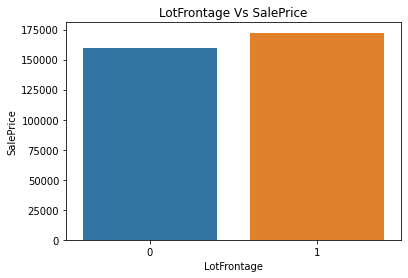

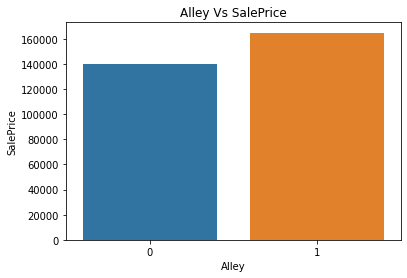

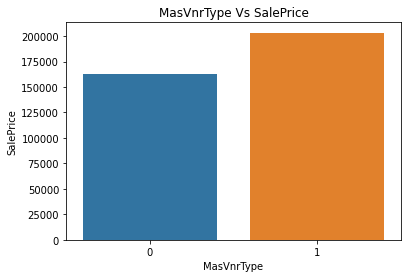

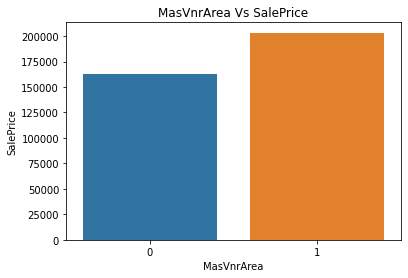

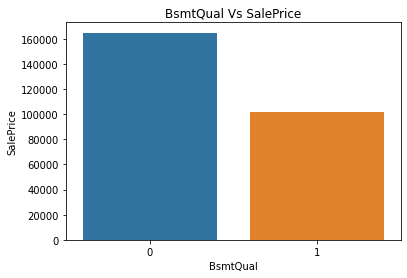

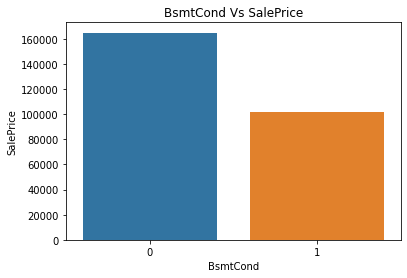

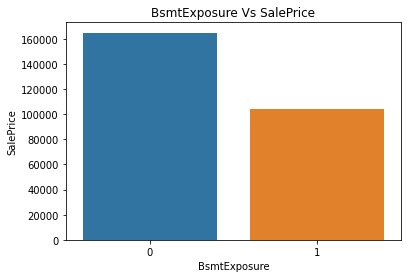

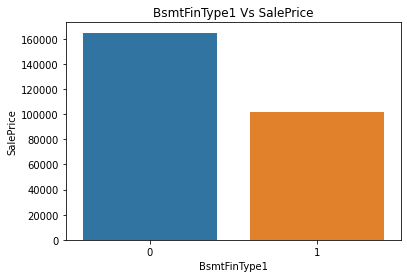

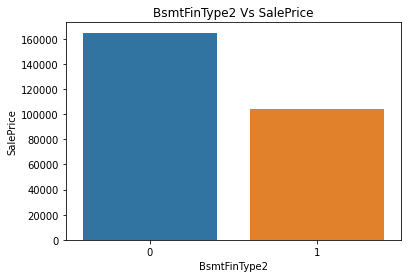

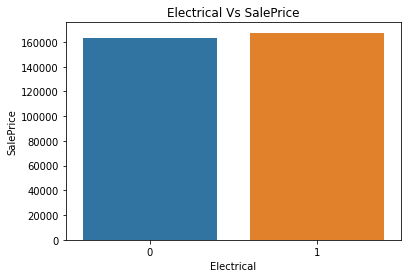

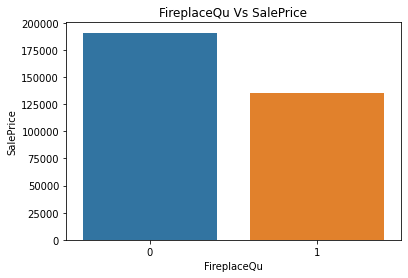

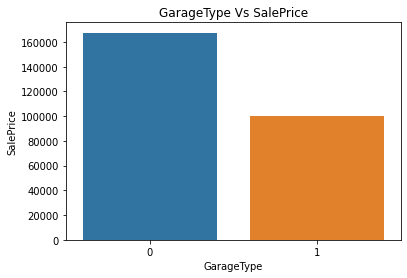

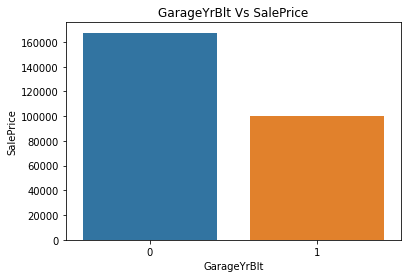

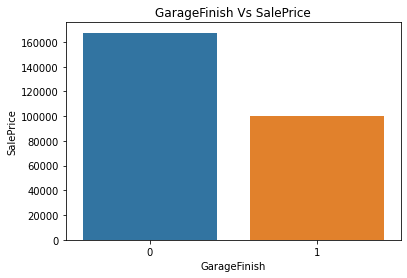

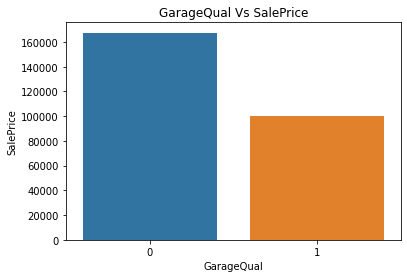

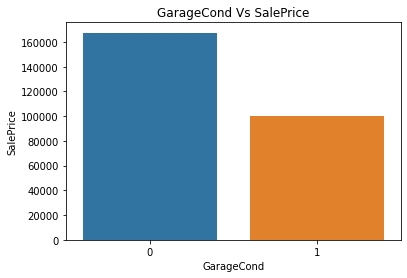

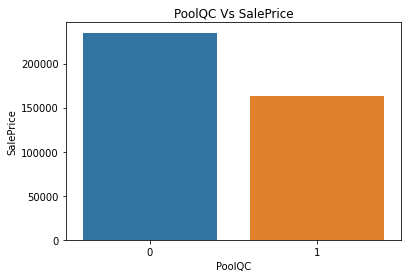

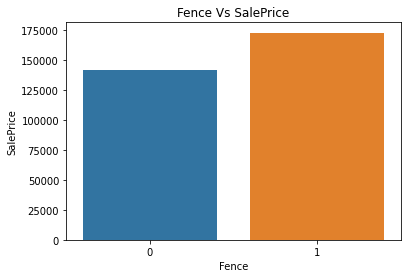

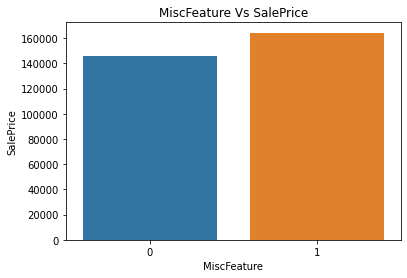

In [300]:
# Checking if the missing values are having an impact on the Depenent Variable

for i in columns_with_missing_values.index:
  data = train_Data.copy()

  data[i] = np.where(data[i].isnull(), 1,0)

  ploter = data.groupby(i)['SalePrice'].median()
  s = i+' Vs SalePrice'
  plt.title(s)
  sns.barplot(x = ploter.index , y = ploter)
  plt.show()

In [301]:
### Now after seeing a clear relationship between the missing values and the Saleprice, We will drop it but rather I will impute them.

In [302]:
# Numerical Variables

nums = train_Data.select_dtypes(include= [np.number])

pd.pandas.set_option('display.max_columns',None)

In [303]:
print("Total numrical columns {}".format(nums.shape[1]))
nums.head()

Total numrical columns 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [304]:
year_features = [i for i in nums.columns if (('Yr' in i) or ('Year' in i))]

In [305]:
nums[year_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


In [306]:
# Temporal Analysis

In [307]:
nums['YrSold'] = nums['YrSold'].round(0)

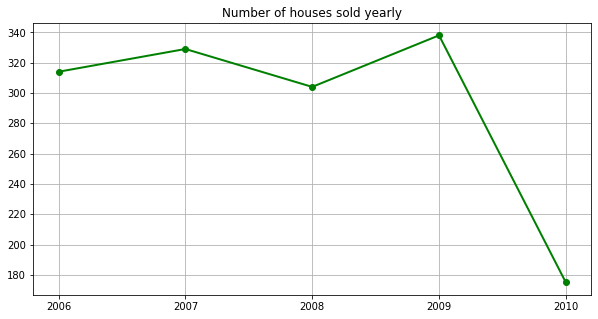

In [308]:
c = nums.groupby('YrSold')['SalePrice'].count()
c.index = c.index.astype(str)
median = c.index.astype(str)
plt.figure(figsize= (10,5))
plt.title("Number of houses sold yearly")
plt.plot(c, color = 'green', marker = 'o', linewidth = 2)
plt.grid()
plt.show()

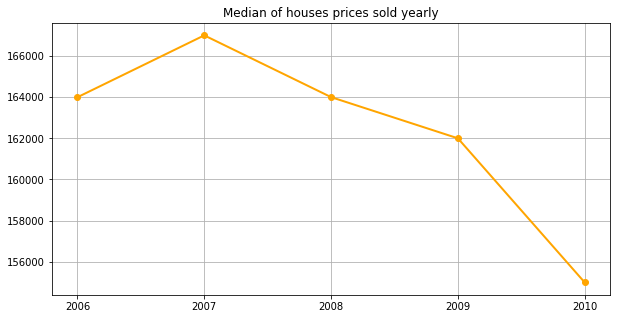

In [309]:
median = nums.groupby('YrSold')['SalePrice'].median()
median.index = median.index.astype(str)
plt.figure(figsize= (10,5))
plt.title("Median of houses prices sold yearly")
plt.plot(median, color = 'orange', marker = 'o', linewidth = 2)
plt.grid()
plt.show()

In [310]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Correaltion between YearBuilt and Sale Price is 0.5228973328794969


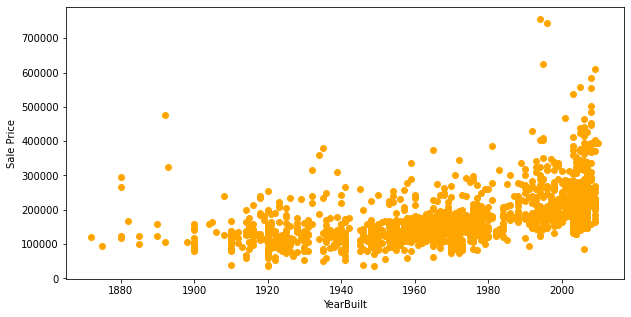

Correaltion between YearRemodAdd and Sale Price is 0.5071009671113865


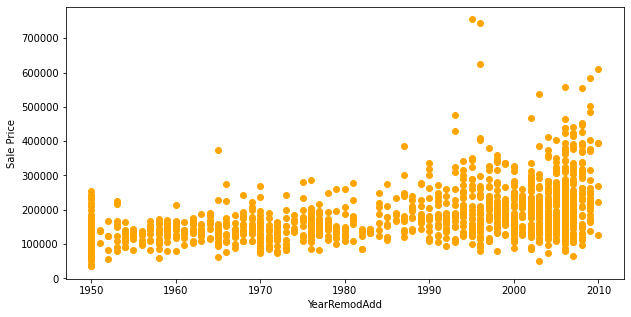

Correaltion between GarageYrBlt and Sale Price is 0.48636167748786097


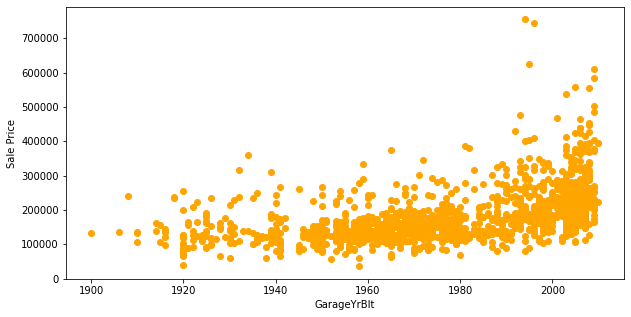

Correaltion between YrSold and Sale Price is -0.028922585168730378


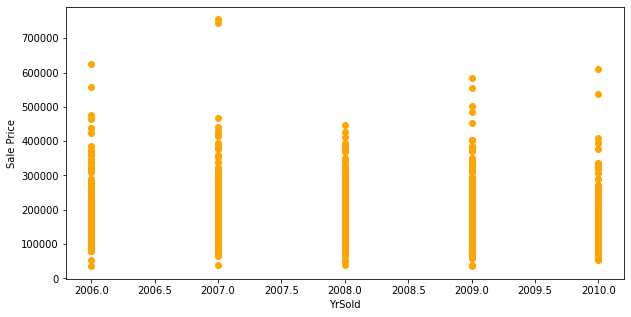

In [311]:
# let's check if the year columns have an effect on the Sale price
for i in year_features:
  print("Correaltion between {} and Sale Price is {}".format(i , nums[i].corr(nums['SalePrice'])))
  plt.figure(figsize= (10,5))
  plt.scatter(nums[i], nums['SalePrice'], color = 'orange')
  plt.xlabel(i)
  plt.ylabel('Sale Price')
  plt.show()

In [312]:
# There is no big correation between year columns and sale price

In [313]:
# Let's find the relationship between discrete cols and Sale Price
dis_cols = []
for i in nums:
  if((i not in year_features+['Id']) and (nums[i].nunique() < 25)):
    dis_cols.append(i)

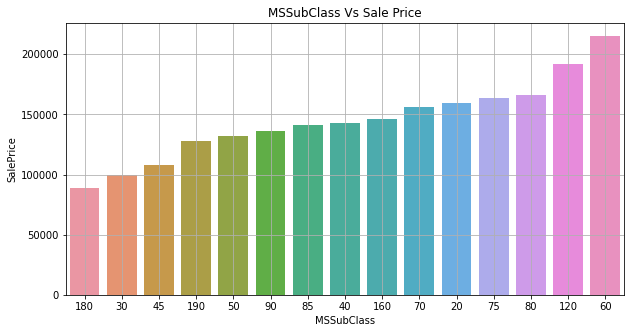

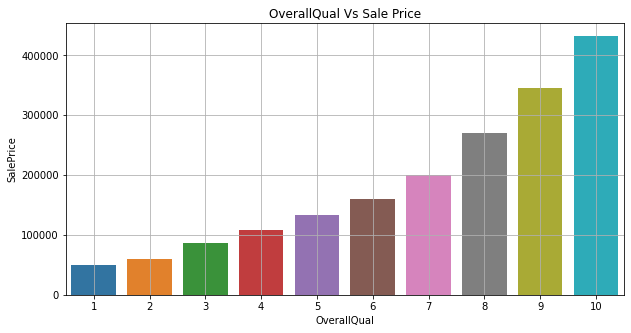

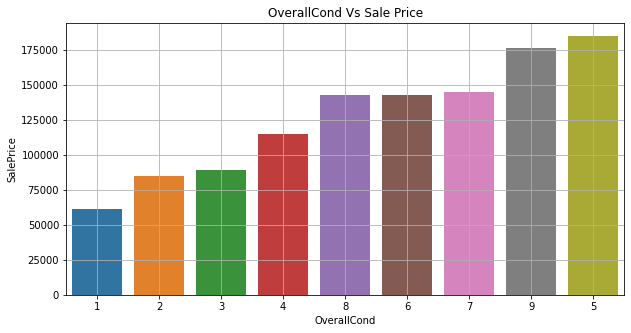

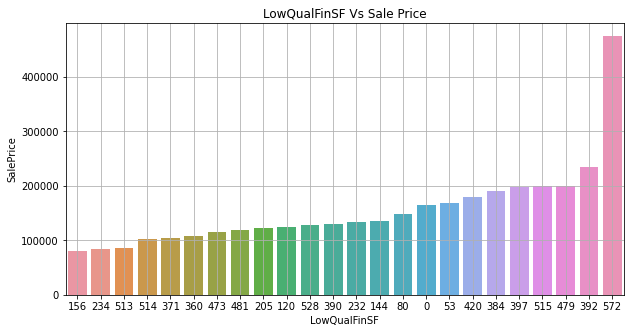

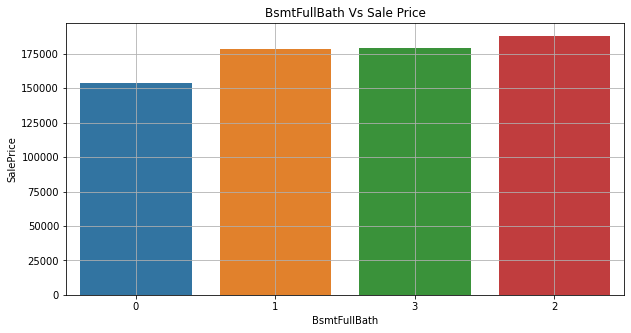

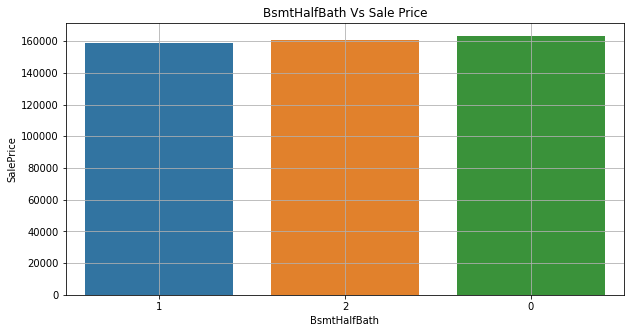

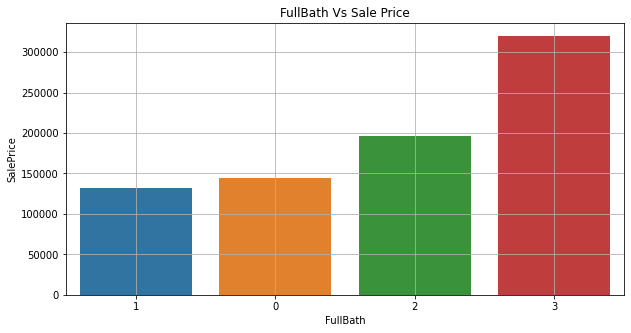

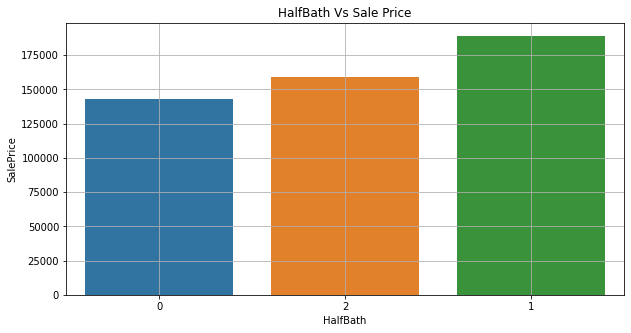

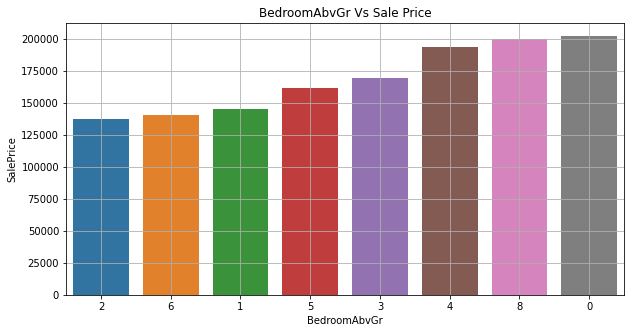

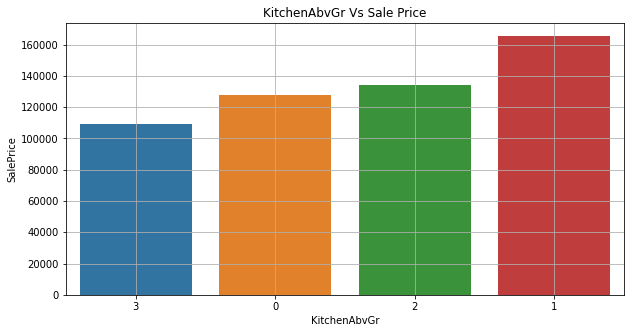

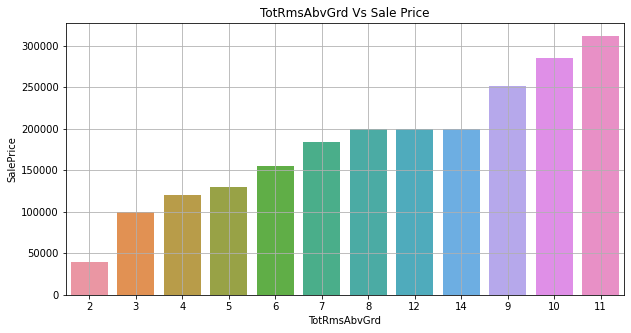

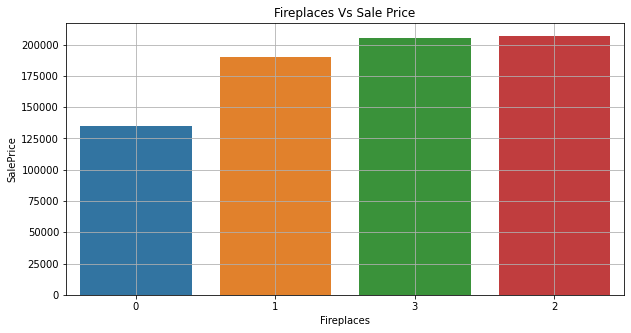

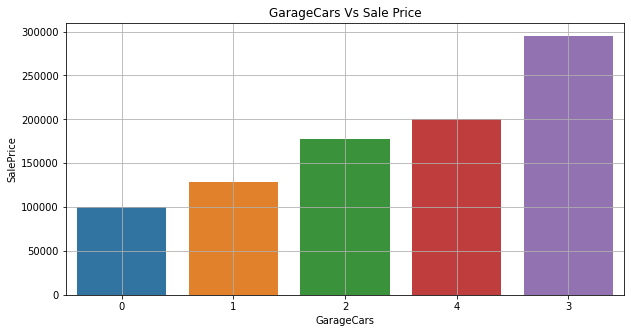

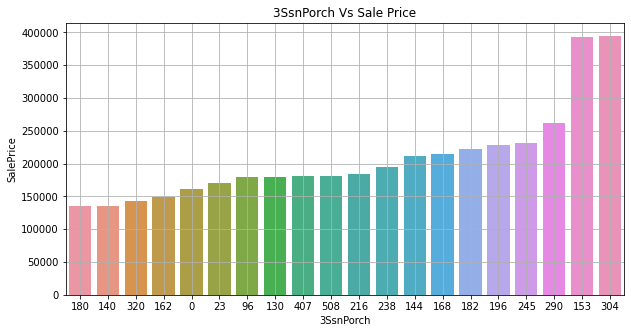

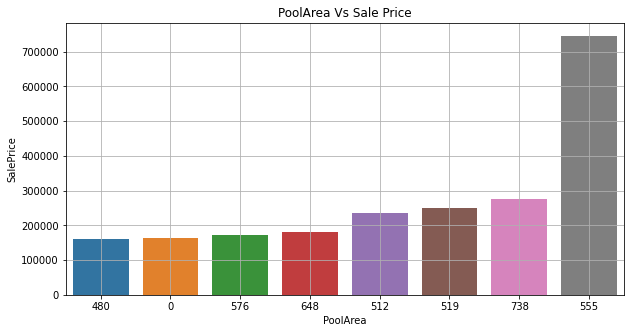

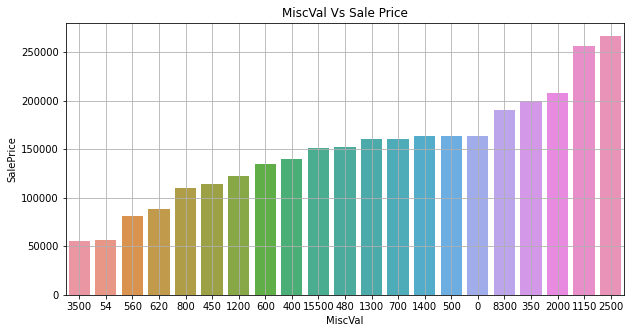

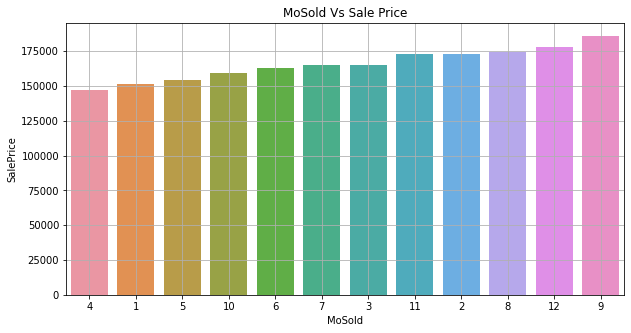

In [314]:
import warnings
warnings.filterwarnings('ignore')

for i in dis_cols:
  s = i+' Vs Sale Price'
  plt.figure(figsize = (10,5))
  plt.title(s)
  xs = nums.groupby(i)['SalePrice'].median().sort_values(ascending = True)
  xs.index = xs.index.astype(str)
  sns.barplot(xs.index, xs)
  plt.xlabel(i)
  plt.ylabel('SalePrice')
  plt.grid()
  plt.show()

The correlation between LotFrontage and Sale Price is 0.35179909657067804
The data is spread in Not_Normal_Distribution


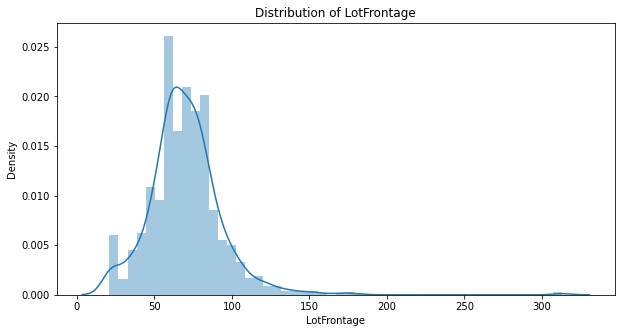

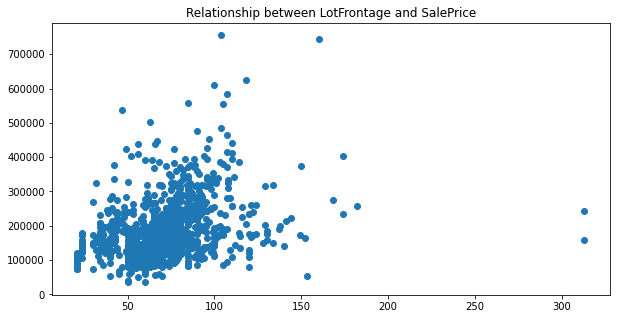

The correlation between LotArea and Sale Price is 0.2638433538714056
The data is spread in Not_Normal_Distribution


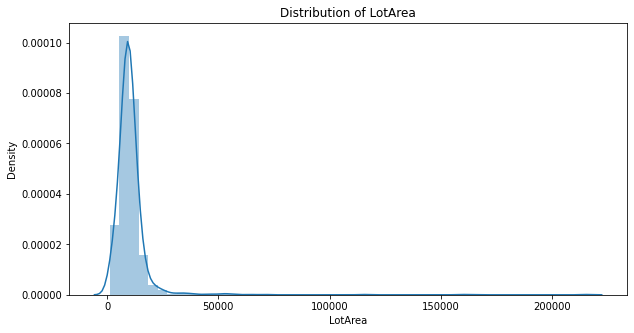

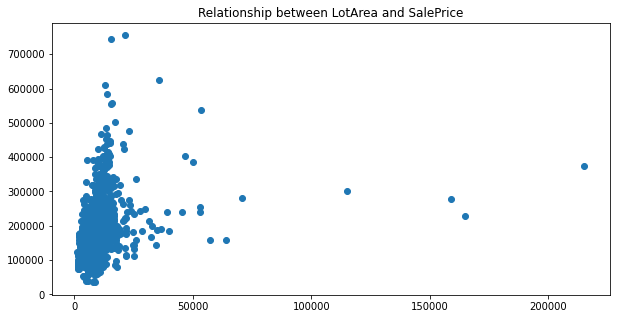

The correlation between MasVnrArea and Sale Price is 0.4774930470957163
The data is spread in Not_Normal_Distribution


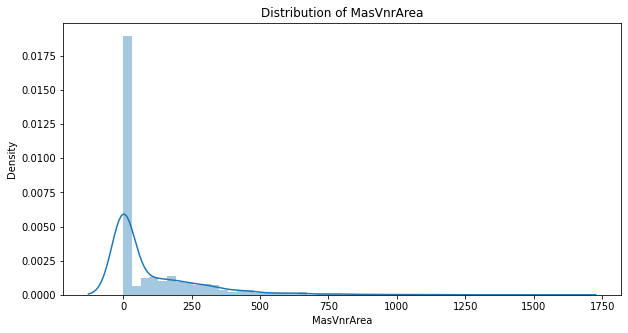

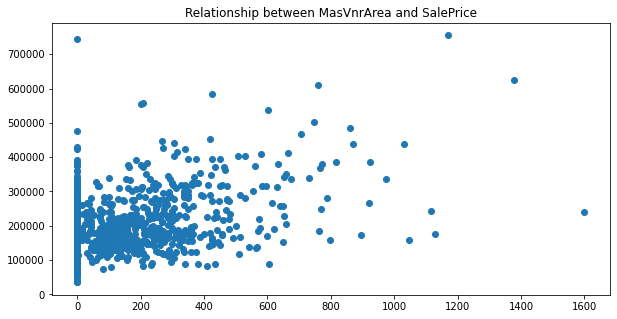

The correlation between BsmtFinSF1 and Sale Price is 0.3864198062421532
The data is spread in Not_Normal_Distribution


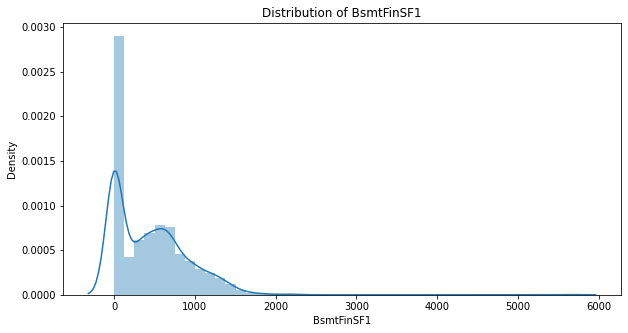

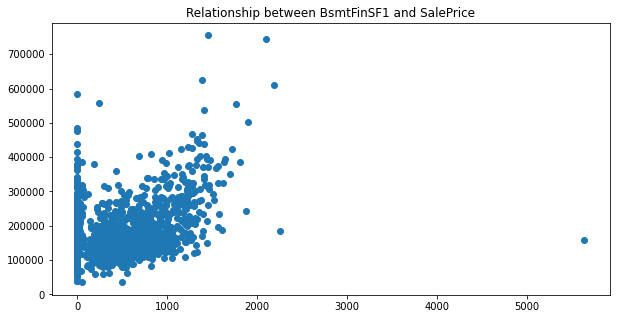

The correlation between BsmtFinSF2 and Sale Price is -0.011378121450215125
The data is spread in Not_Normal_Distribution


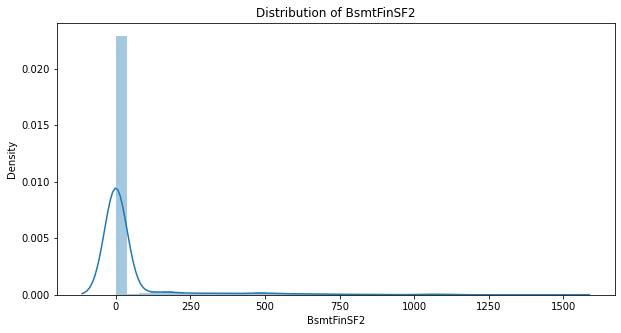

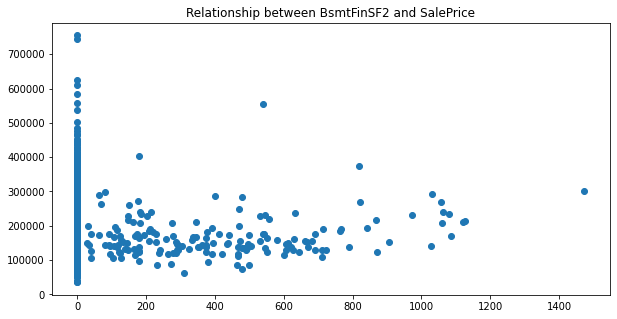

The correlation between BsmtUnfSF and Sale Price is 0.21447910554696892
The data is spread in Not_Normal_Distribution


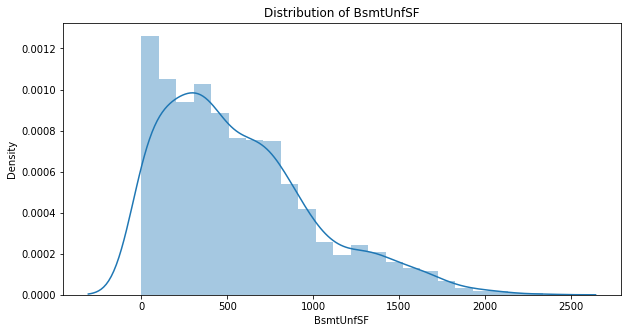

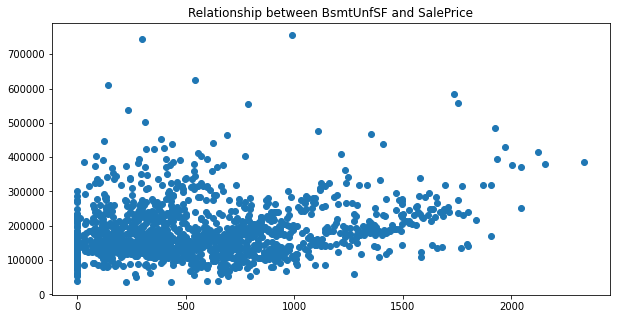

The correlation between TotalBsmtSF and Sale Price is 0.6135805515591956
The data is spread in Not_Normal_Distribution


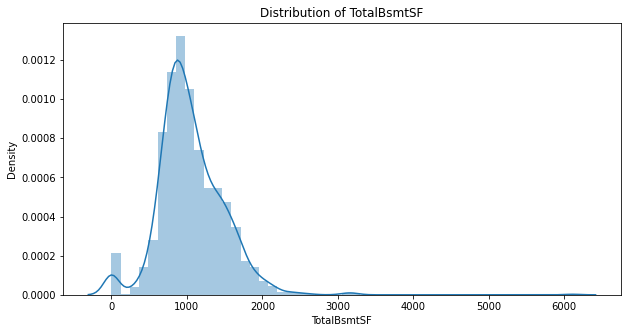

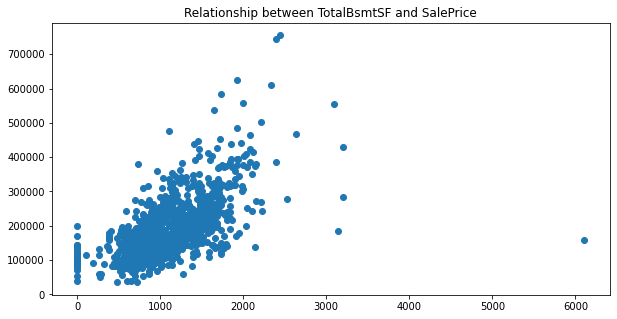

The correlation between 1stFlrSF and Sale Price is 0.6058521846919147
The data is spread in Not_Normal_Distribution


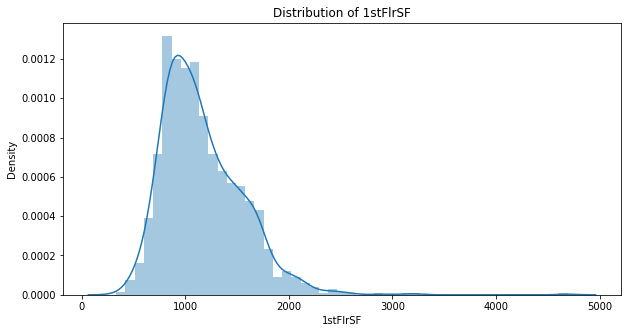

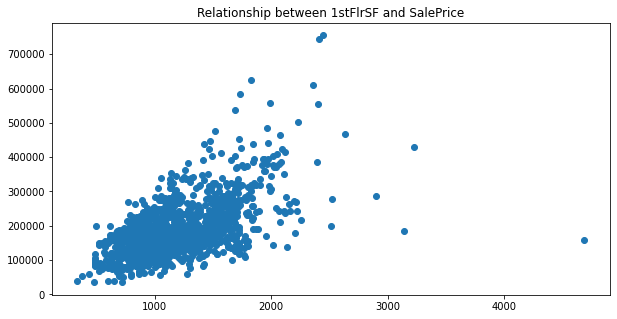

The correlation between 2ndFlrSF and Sale Price is 0.3193338028320681
The data is spread in Not_Normal_Distribution


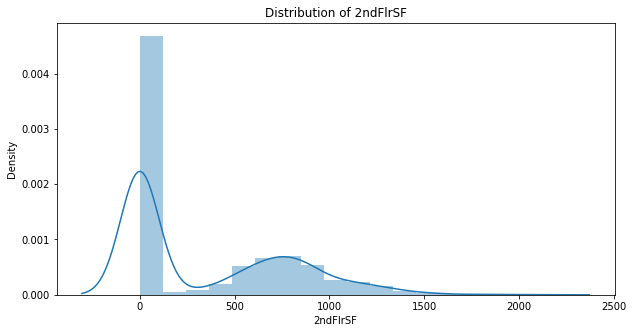

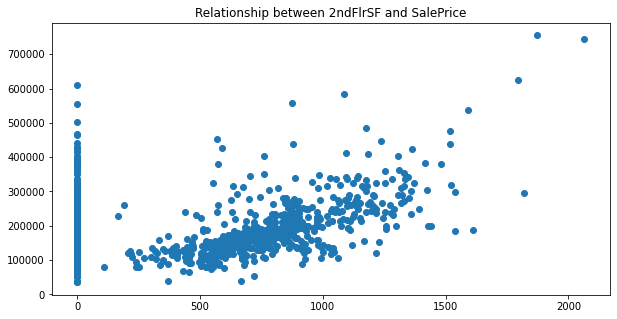

The correlation between GrLivArea and Sale Price is 0.7086244776126523
The data is spread in Not_Normal_Distribution


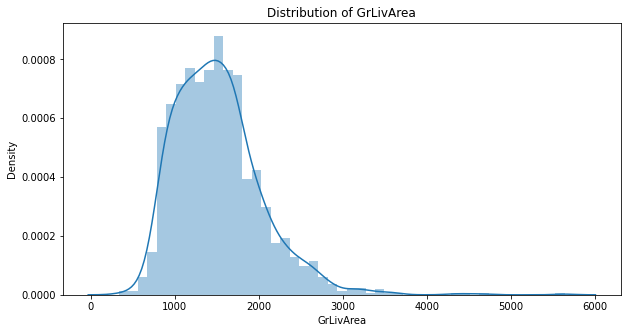

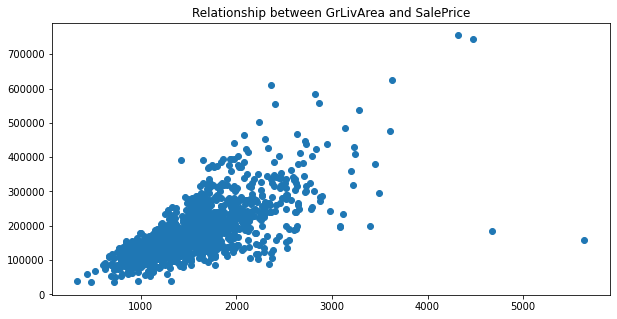

The correlation between GarageArea and Sale Price is 0.6234314389183618
The data is spread in Not_Normal_Distribution


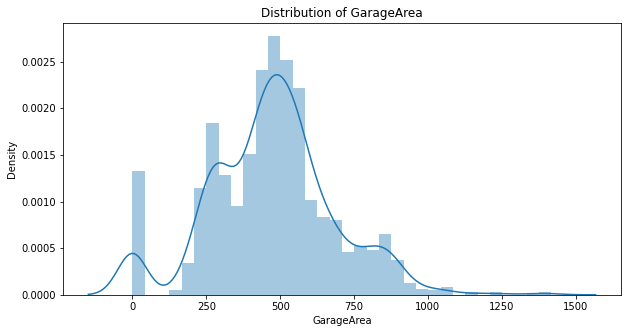

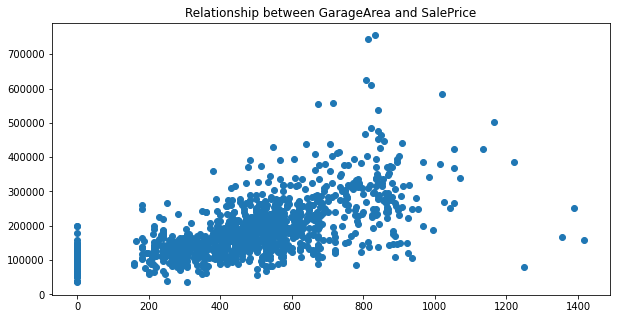

The correlation between WoodDeckSF and Sale Price is 0.3244134445681294
The data is spread in Not_Normal_Distribution


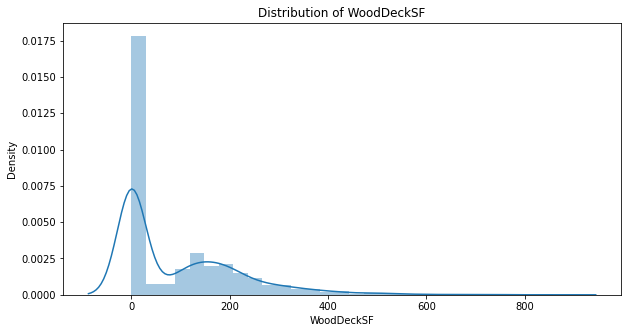

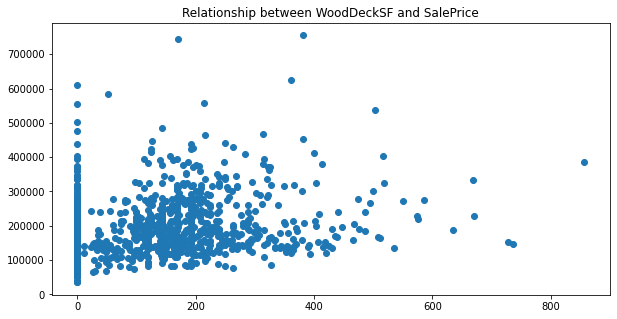

The correlation between OpenPorchSF and Sale Price is 0.3158562271160555
The data is spread in Not_Normal_Distribution


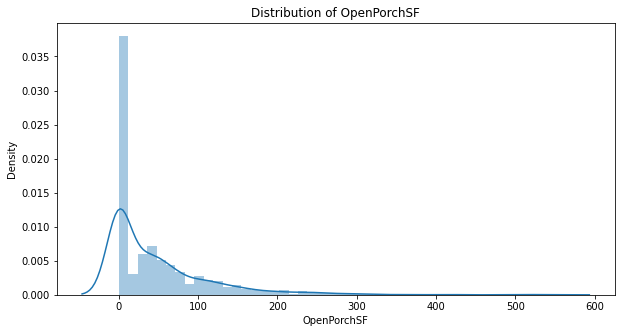

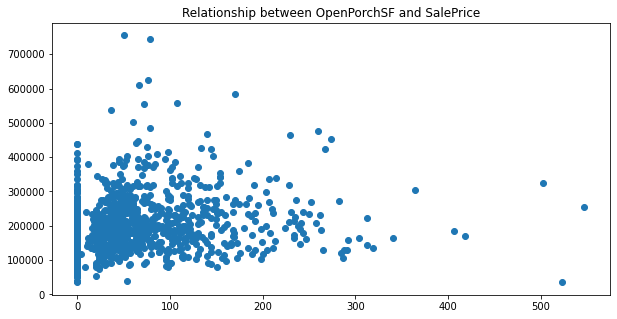

The correlation between EnclosedPorch and Sale Price is -0.12857795792595653
The data is spread in Not_Normal_Distribution


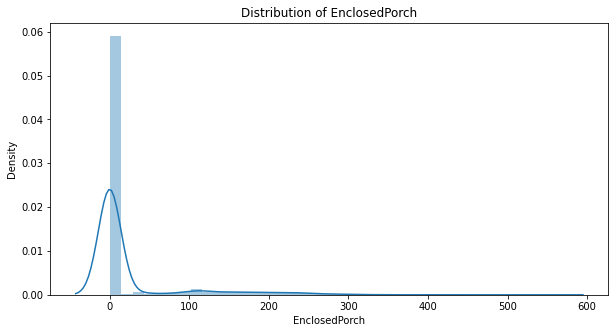

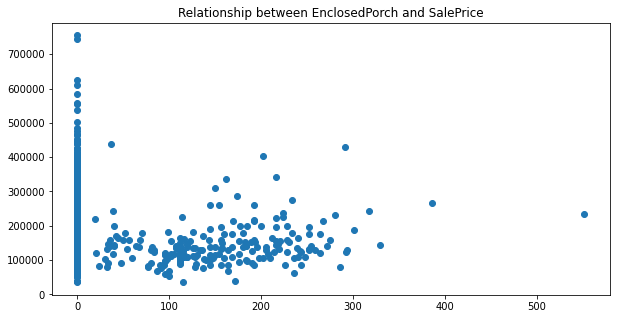

The correlation between ScreenPorch and Sale Price is 0.11144657114291105
The data is spread in Not_Normal_Distribution


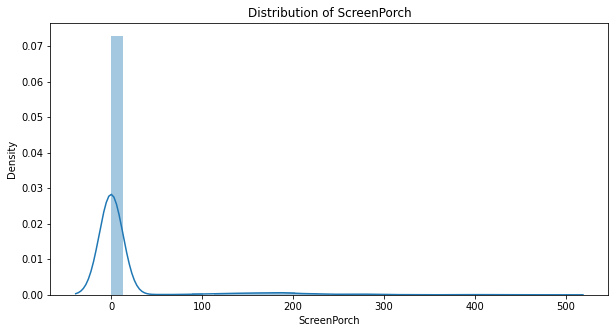

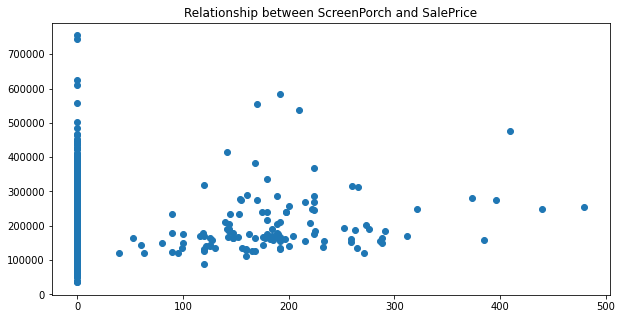

The correlation between SalePrice and Sale Price is 1.0
The data is spread in Not_Normal_Distribution


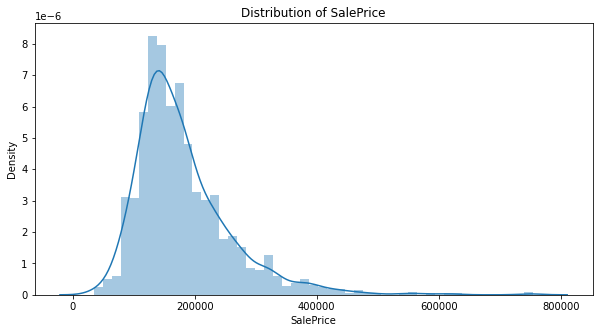

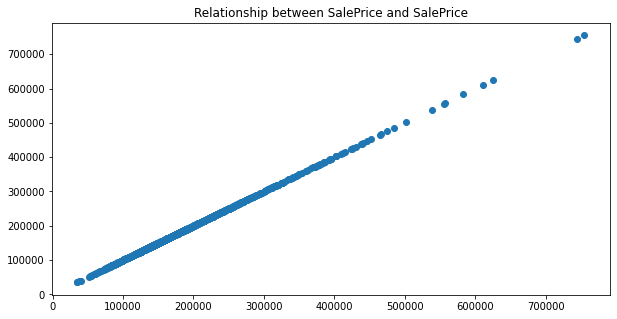

In [315]:
# Checking the relationship between continuous variables and the Saleprice 
from scipy.stats import anderson

Continuous_features = [i for i in nums.columns if i not in dis_cols+year_features+['Id']]

for i in Continuous_features:
  print("The correlation between {} and {} is {}".format(i, 'Sale Price', nums[i].corr(nums['SalePrice'])))
  
  ## Checking if the varible is in normal Distribution or not using anderson darling test
  results = anderson(nums[i], dist = 'norm')
  normal = ''
  if (results.statistic < results.critical_values[2]):
    normal = 'Normal_Distribution'
  else:
    normal = 'Not_Normal_Distribution'
  
  print("The data is spread in {}". format(normal))

  ## Plotting the distribution of the variable
  plt.figure(figsize = (10,5))
  plt.title("Distribution of {}".format(i))
  sns.distplot(nums[i])
  plt.show()

  ## Plotting the relationship of the variable and dependent variable
  plt.figure(figsize = (10,5))
  plt.title("Relationship between {} and {}".format(i, 'SalePrice'))
  x = np.log(nums[i])
  y = np.log(nums['SalePrice'])
  plt.scatter(nums[i], nums['SalePrice'])
  plt.show()

  print("==========================================================================================================")


MSZoning is a categorical feature and it has 5 levels


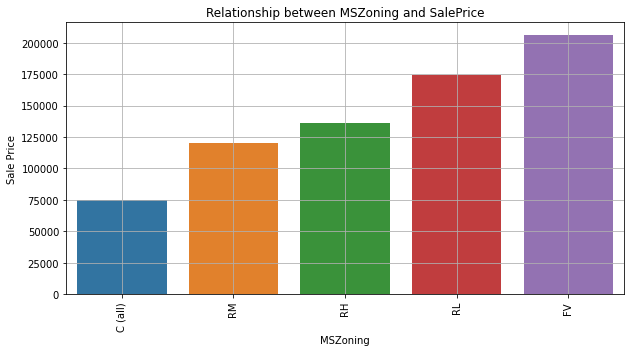

Street is a categorical feature and it has 2 levels


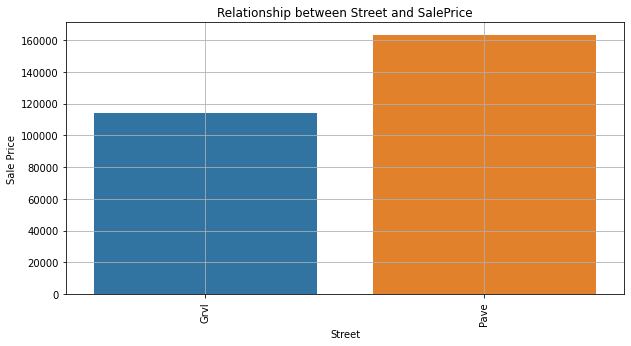

Alley is a categorical feature and it has 2 levels


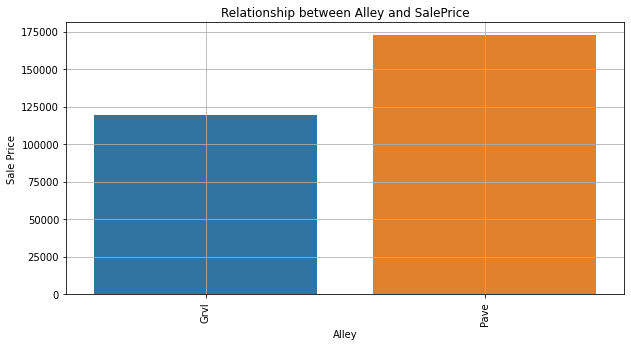

LotShape is a categorical feature and it has 4 levels


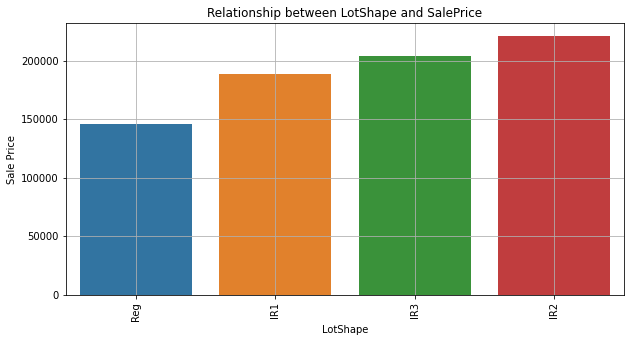

LandContour is a categorical feature and it has 4 levels


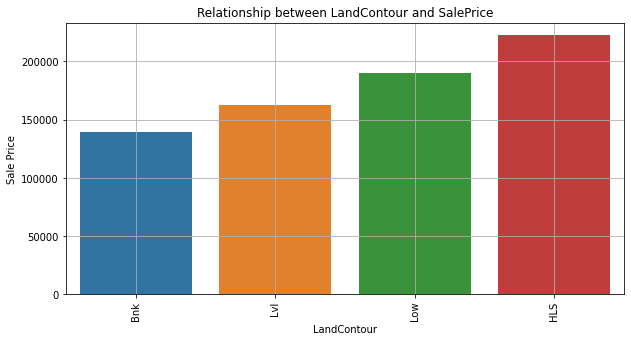

Utilities is a categorical feature and it has 2 levels


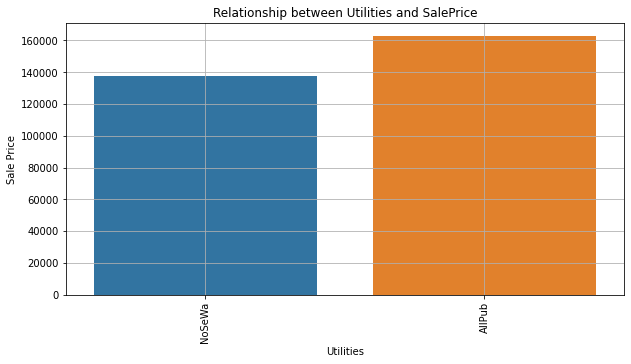

LotConfig is a categorical feature and it has 5 levels


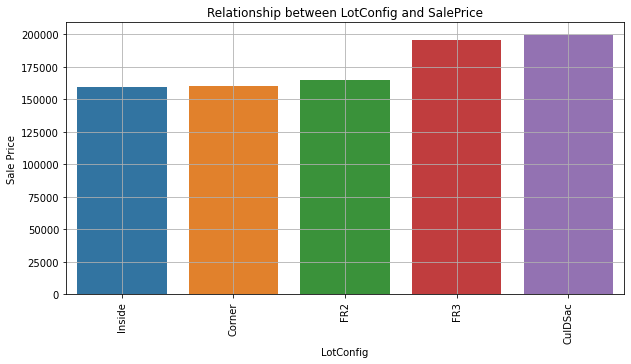

LandSlope is a categorical feature and it has 3 levels


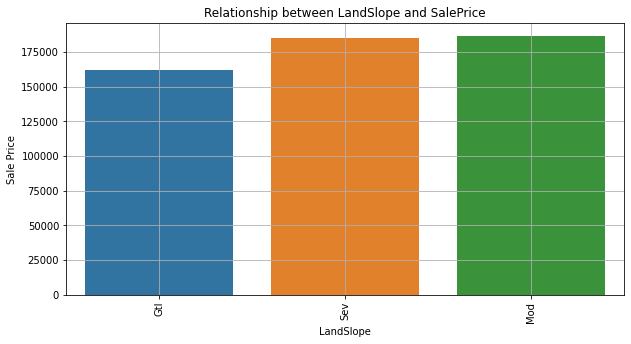

Neighborhood is a categorical feature and it has 25 levels


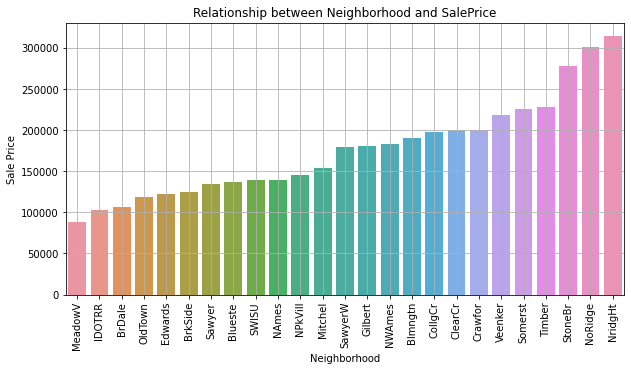

Condition1 is a categorical feature and it has 9 levels


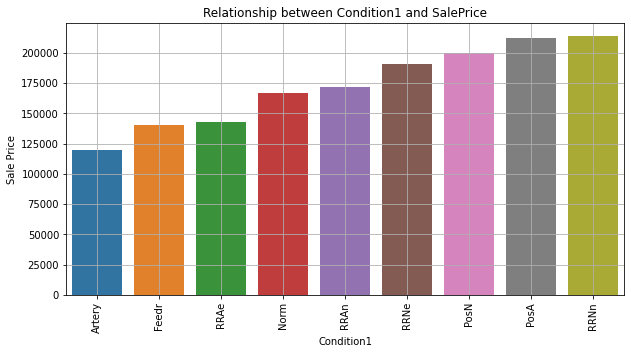

Condition2 is a categorical feature and it has 8 levels


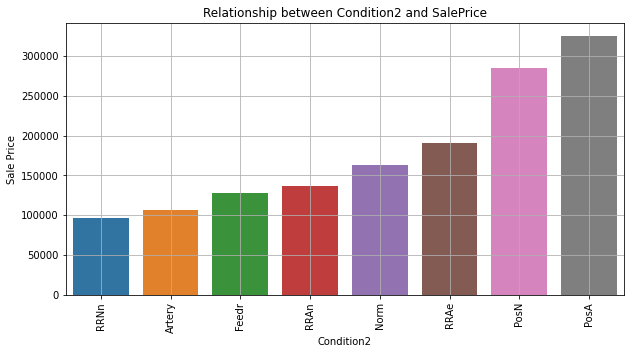

BldgType is a categorical feature and it has 5 levels


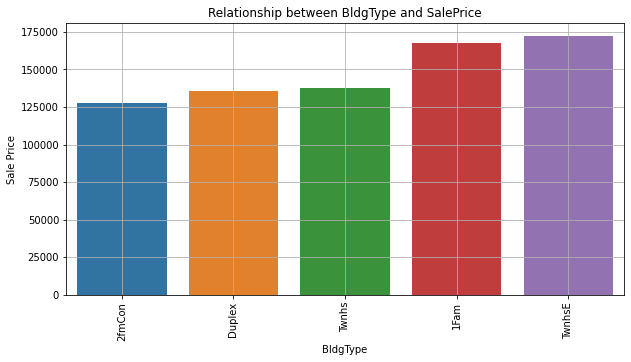

HouseStyle is a categorical feature and it has 8 levels


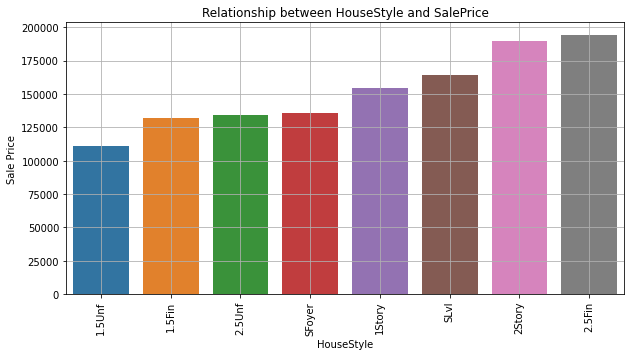

RoofStyle is a categorical feature and it has 6 levels


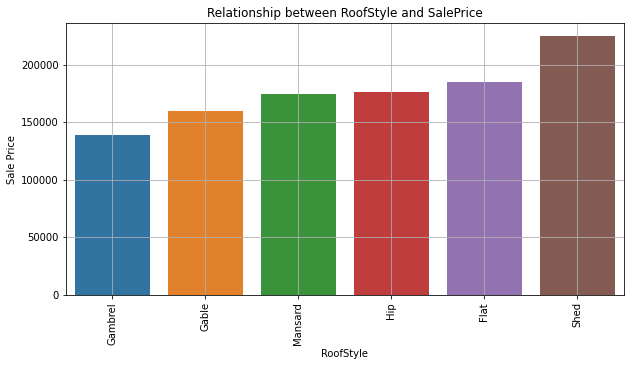

RoofMatl is a categorical feature and it has 8 levels


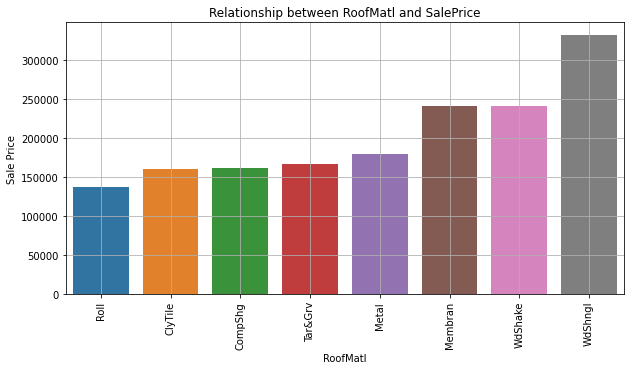

Exterior1st is a categorical feature and it has 15 levels


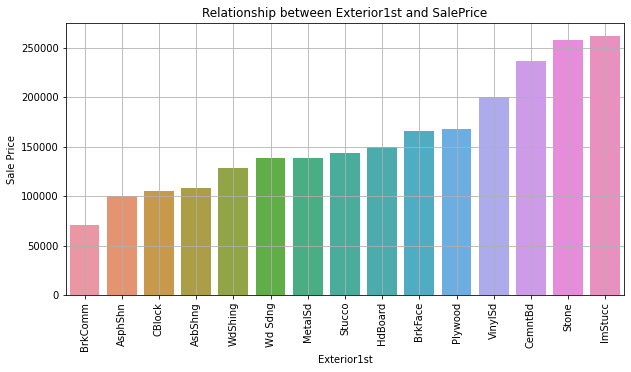

Exterior2nd is a categorical feature and it has 16 levels


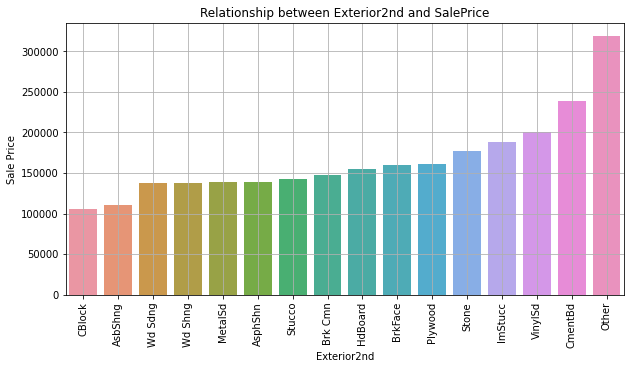

MasVnrType is a categorical feature and it has 4 levels


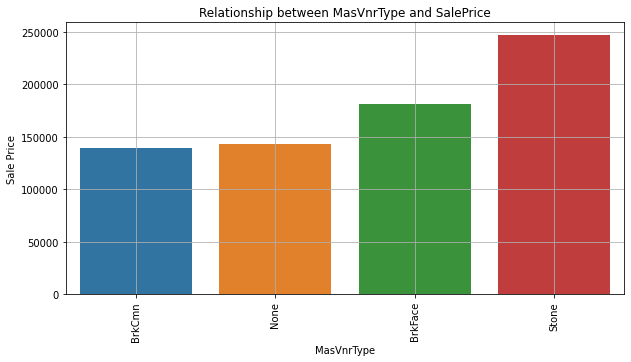

ExterQual is a categorical feature and it has 4 levels


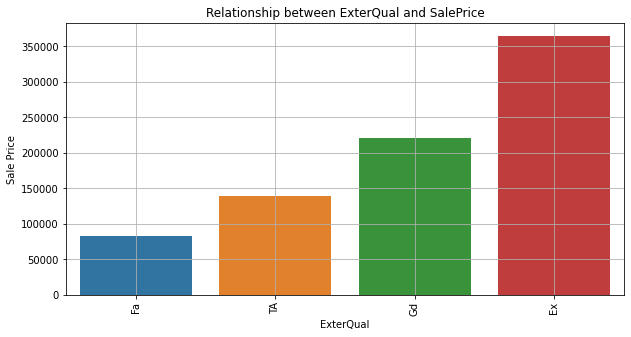

ExterCond is a categorical feature and it has 5 levels


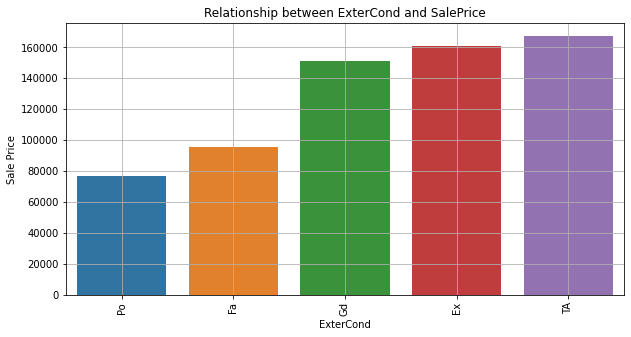

Foundation is a categorical feature and it has 6 levels


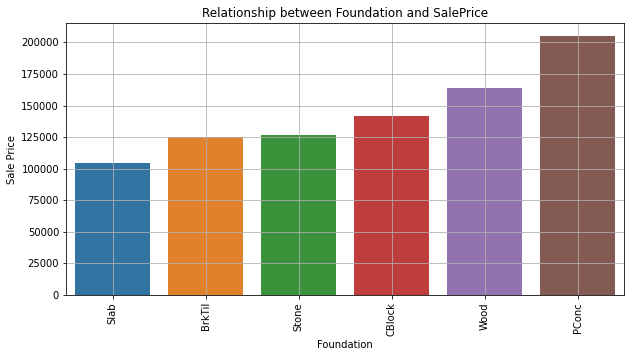

BsmtQual is a categorical feature and it has 4 levels


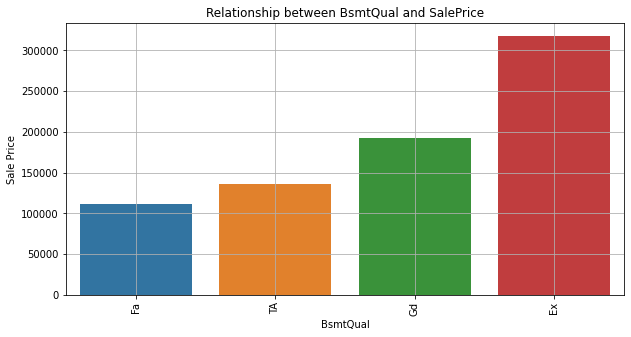

BsmtCond is a categorical feature and it has 4 levels


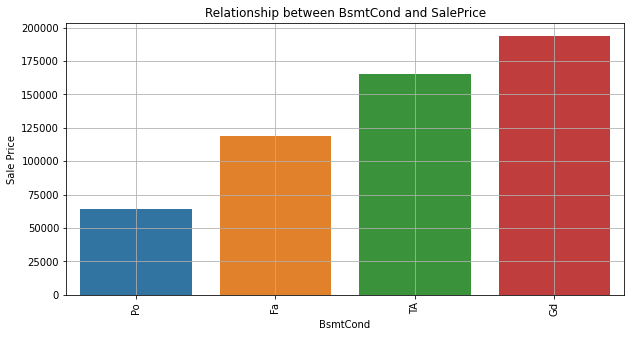

BsmtExposure is a categorical feature and it has 4 levels


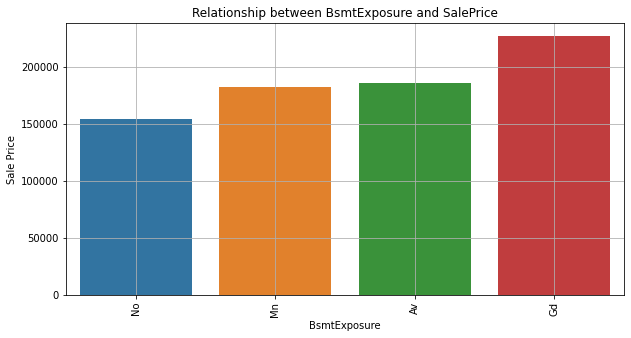

BsmtFinType1 is a categorical feature and it has 6 levels


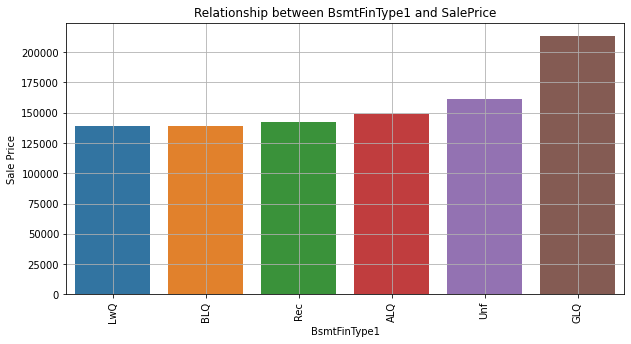

BsmtFinType2 is a categorical feature and it has 6 levels


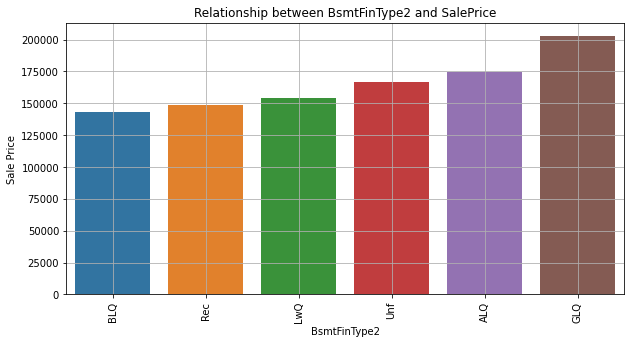

Heating is a categorical feature and it has 6 levels


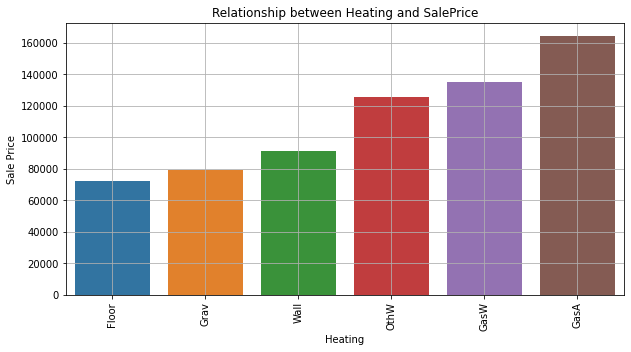

HeatingQC is a categorical feature and it has 5 levels


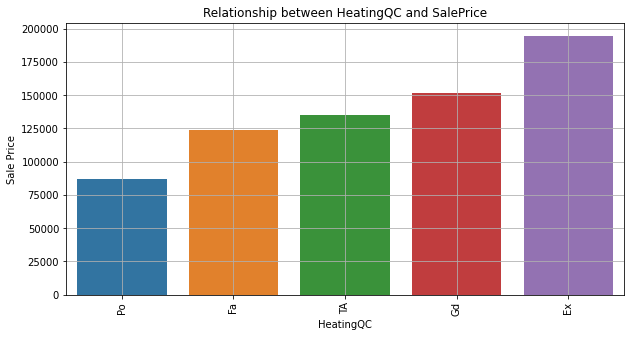

CentralAir is a categorical feature and it has 2 levels


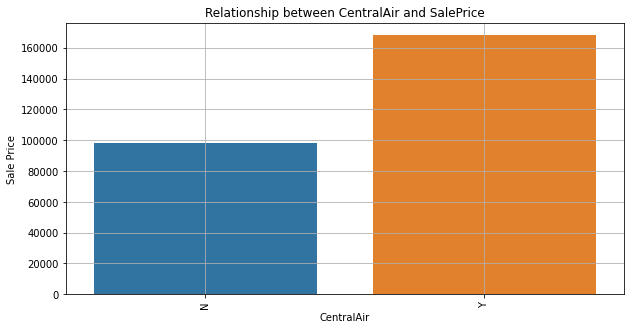

Electrical is a categorical feature and it has 5 levels


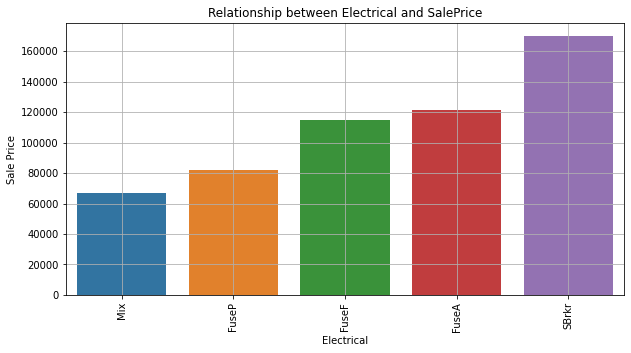

KitchenQual is a categorical feature and it has 4 levels


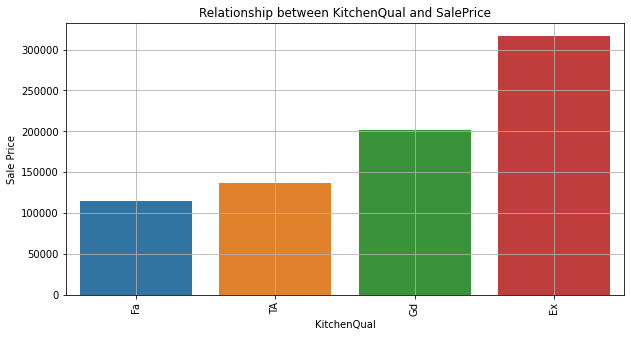

Functional is a categorical feature and it has 7 levels


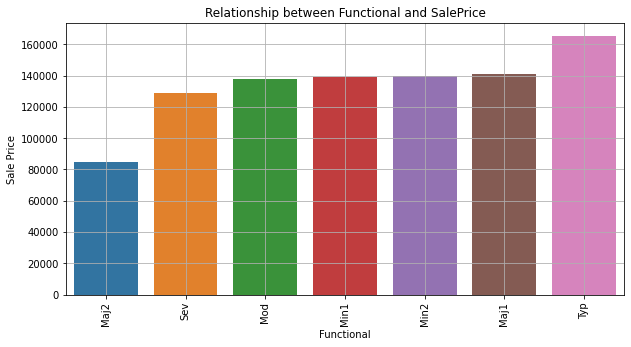

FireplaceQu is a categorical feature and it has 5 levels


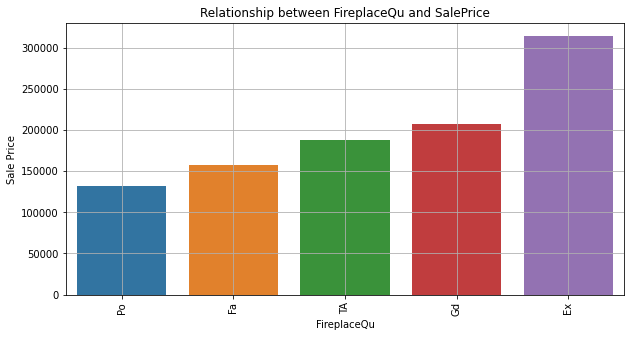

GarageType is a categorical feature and it has 6 levels


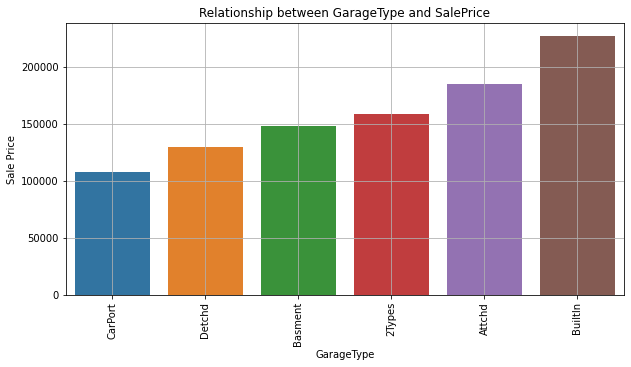

GarageFinish is a categorical feature and it has 3 levels


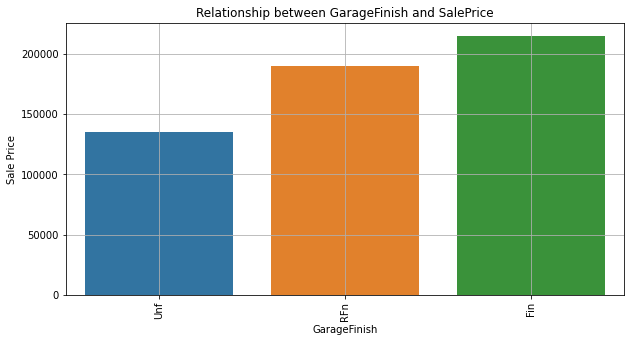

GarageQual is a categorical feature and it has 5 levels


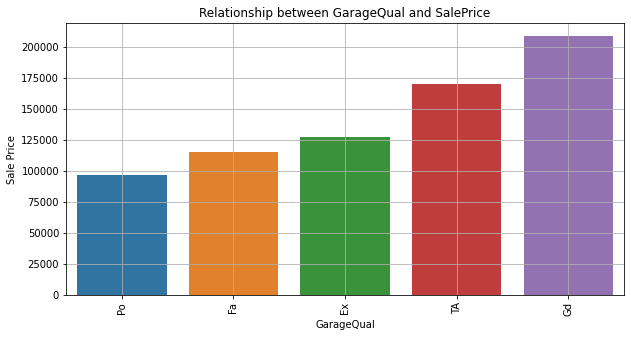

GarageCond is a categorical feature and it has 5 levels


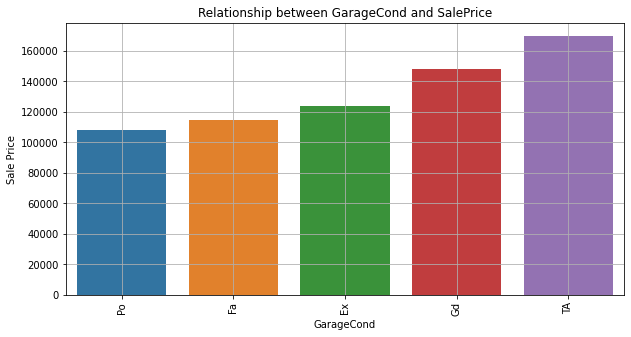

PavedDrive is a categorical feature and it has 3 levels


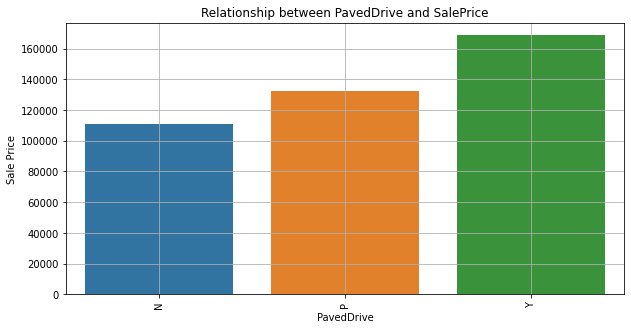

PoolQC is a categorical feature and it has 3 levels


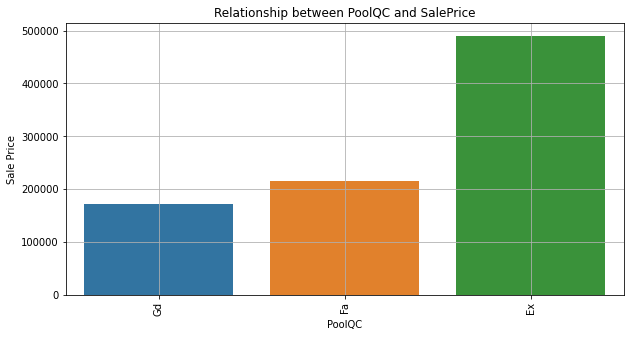

Fence is a categorical feature and it has 4 levels


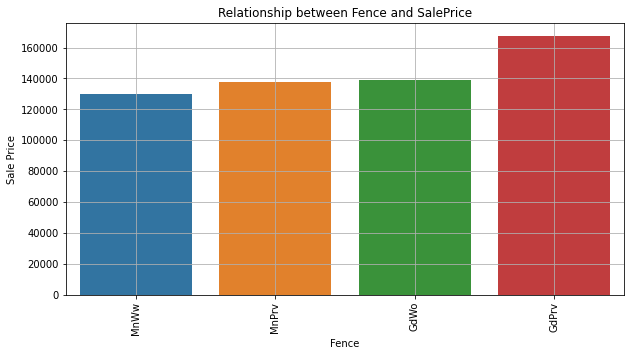

MiscFeature is a categorical feature and it has 4 levels


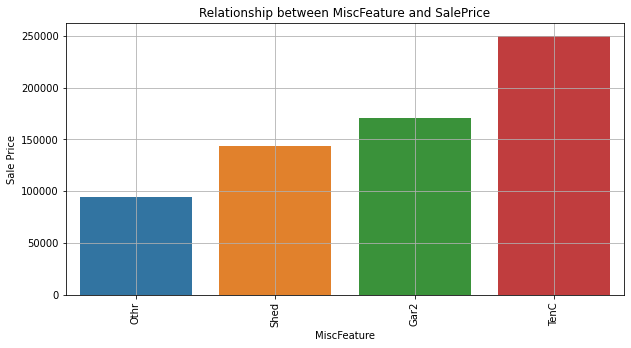

SaleType is a categorical feature and it has 9 levels


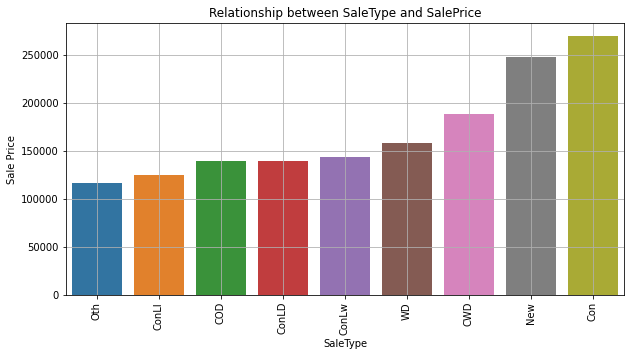

SaleCondition is a categorical feature and it has 6 levels


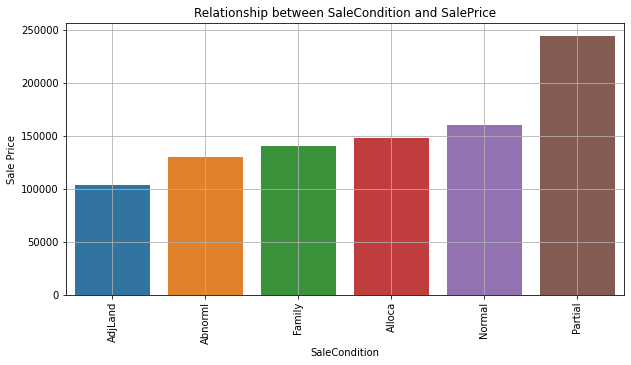

In [316]:

Cat_data = train_Data.select_dtypes(include= [np.object])

for i in Cat_data:
  # Printing the descriptive statistics of the features
  print("{} is a categorical feature and it has {} levels".format(i, train_Data[i].nunique()))


  xs = train_Data.groupby(i)['SalePrice'].median().sort_values()
  plt.figure(figsize= (10,5))
  plt.title("Relationship between {} and {}".format(i , 'SalePrice'))
  sns.barplot(xs.index, xs)
  plt.xlabel(i)
  plt.ylabel("Sale Price")
  plt.xticks(rotation = 90)
  plt.grid()
  plt.show()


In [317]:
# Missing Value Imputation
def missing_value_imputer(train_Data):

  #Pulling out the categorical columns
  Categorical_columns = train_Data.select_dtypes(include =  [np.object])
  
  # Imputing Categorical columns
  for i in Categorical_columns:
    if(train_Data[i].isnull().any()):
      train_Data[i].fillna('Missing', inplace= True)
    else:
      pass
  
  # From the observation in the above cell I can see all the numerical featuers are not in normal distribution.
  # Imputing numerical features with median

  Numerical_columns = train_Data.select_dtypes(include =  [np.number])

  for i in Numerical_columns:
    if(train_Data[i].isnull().any()):
      train_Data[i].fillna(train_Data[i].median(), inplace= True)
    else:
      pass

  return train_Data

In [318]:
train_Data = missing_value_imputer(train_Data)

In [319]:
print("Tell me in boolean does the dataset have any missing values. Answer: {}".format(train_Data.isnull().any().any()))

Tell me in boolean does the dataset have any missing values. Answer: False


In [320]:
# In the year features, the difference between Year Sold and other columns gives a meaning full number
# like YrSold - YearBuilt gives the age of the house
# YrSold - YearRemoAdd gives the years from last Renovation- Modification Done
# YrSold - GarageYrBuilt gives the age of the Garage
def modify_year_cols(train_Data):
  for i in year_features[:-1]:
    train_Data[i] = train_Data['YrSold']-train_Data[i]
  return train_Data

In [321]:
train_Data = modify_year_cols(train_Data)
train_Data[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [338]:
def log_transformations(nums, dis_cols, year_features, train_Data):

#  Log transformation of features which are not in normal dist
  Continuous_RVs = set(nums.columns) - set(dis_cols+['Id']+year_features)

  # Extracting non zero columns
  # Because log(0) is Infinity and the ML model can't handel infinity, so can log transform only the cols
  # Which has no zero values in it
  non_zero_feature = []
  for i in Continuous_RVs:
    if(len(nums[nums[i] == 0]) == 0):
      non_zero_feature.append(i)
      train_Data[i] = np.log(train_Data[i])
    else:
      pass
  return train_Data

In [339]:
train_Data = log_transformations(nums,dis_cols, year_features,train_Data)

In [340]:
train_Data['SalePrice'].head() # Log Transformed

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [341]:
# Handling Rare Categorical Data

def Rare_Categorical_data_handler(train_Data):
  cats = train_Data.select_dtypes(include= [np.object])
  for i in cats:
    temp = train_Data.groupby(i)['SalePrice'].count()/len(train_Data)
    temp_df = temp[temp>0.01].index
    train_Data[i] = np.where(train_Data[i].isin(temp_df),train_Data[i], 'Rare_val')
  return train_Data

In [342]:
train_Data = Rare_Categorical_data_handler(train_Data)

In [343]:
train_Data['MSZoning'][train_Data['MSZoning'] == 'Rare_val'] # We have the Rare_categorical values replaced

Series([], Name: MSZoning, dtype: int64)

In [344]:
# Lable Encoding the ordinal categorical variables
def categorical_features_encoding(train_Data):
  categorical_features = train_Data.select_dtypes(include= [np.object])
  for i in categorical_features:
      labels_ordered=train_Data.groupby([i])['SalePrice'].mean().sort_values().index
      labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
      train_Data[i]=train_Data[i].map(labels_ordered)
  return train_Data

In [345]:
train_Data = categorical_features_encoding(train_Data)

In [346]:
train_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,15,4,1,4,5,7,5,5,5,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,1,0,12,1,1,4,4,6,8,31,31,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7,6,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,2,0,16,4,1,4,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,1,0,22,4,1,4,5,8,5,8,8,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216


In [347]:
def Scaling(train_Data):
  from sklearn.preprocessing import MinMaxScaler
  scaled_cols = [i for i in train_Data.columns if i not in ['Id', 'SalePrice']]
  scaler = MinMaxScaler()
  scaler.fit(train_Data[scaled_cols])
  scaled_df = scaler.transform(train_Data[scaled_cols])
  return scaled_df, scaler

In [348]:
Scaled_df, scaler_obj = Scaling(train_Data)

In [349]:
Scaled_df = pd.DataFrame(Scaled_df)
Scaled_df.columns = train_Data.columns.tolist()[1:-1]
final_ml_df = pd.concat([Scaled_df, train_Data['SalePrice']], axis = 1)
final_ml_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.9,0.9,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,12.247694
1,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.1,0.2,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,12.109011
2,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.9,0.9,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,12.317167
3,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,11.849398
4,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.9,0.9,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,12.429216


In [350]:
# Spliting the dataset

In [351]:
from sklearn.model_selection import train_test_split
X = final_ml_df.drop('SalePrice', axis= 1)
y = final_ml_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y)
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(1095, 79)
(365, 79)
(1095,)
(365,)


In [372]:
# Feature Selection using Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.002, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

feature_sel_model.get_support()

# Displaying the important features found by lasso regression
print(pd.Series(X_train.columns.tolist())[feature_sel_model.get_support()].reset_index(drop = True))

# Columns selected using lasso regression
list_cols_selected_using_lasso = list(pd.Series(X_train.columns.tolist())[feature_select.get_support()])

0        MSSubClass
1          MSZoning
2          LotShape
3         LotConfig
4      Neighborhood
5        Condition1
6       OverallQual
7       OverallCond
8      YearRemodAdd
9         RoofStyle
10      Exterior1st
11       MasVnrType
12        ExterQual
13       Foundation
14         BsmtQual
15     BsmtExposure
16        HeatingQC
17       CentralAir
18         1stFlrSF
19        GrLivArea
20     BsmtFullBath
21         FullBath
22         HalfBath
23      KitchenQual
24     TotRmsAbvGrd
25       Fireplaces
26      FireplaceQu
27       GarageType
28     GarageFinish
29       GarageCars
30       PavedDrive
31      ScreenPorch
32    SaleCondition
dtype: object


Variance Explained by 25 PCA components is 0.8150469920012873


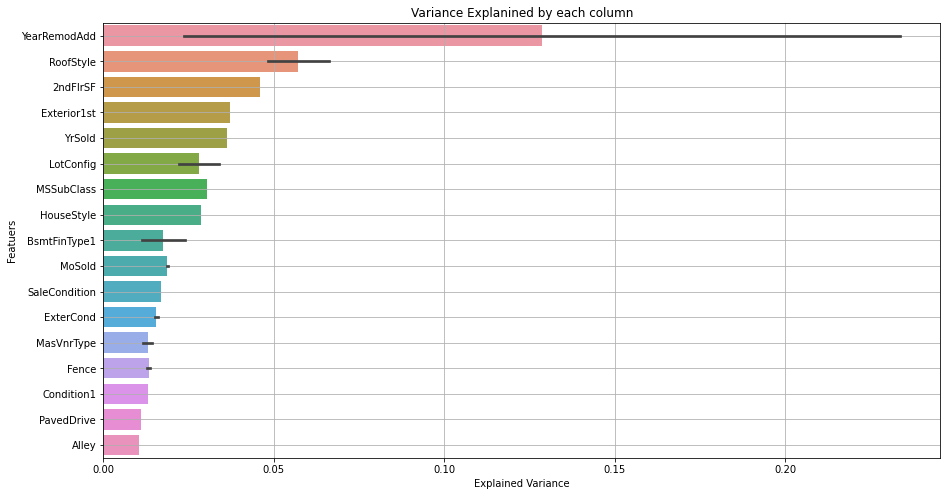

In [362]:
# PCA
from sklearn.decomposition import PCA 

pca = PCA(n_components= 25)

pca.fit(X_train)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.fit_transform(X_test)

column_indexes = [np.abs(pca.fit(X_train).components_[i]).argmax() for i in range(25)]
columns_from__PCA = pd.Series(X_train.columns)[column_indexes]
xs = pd.concat([columns_from__PCA.reset_index(drop = True), pd.Series(pca.explained_variance_ratio_)], axis = 1)
print('Variance Explained by 25 PCA components is {}'.format(pca.explained_variance_ratio_.sum()))
plt.figure(figsize = (15,8))
plt.title("Variance Explanined by each column")
sns.barplot(x = xs.iloc[:,1], y = xs.iloc[:,0])
plt.xlabel('Explained Variance')
plt.ylabel('Featuers')
plt.grid()
plt.show()

In [382]:
# Building the Full Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

#Resacling the predictions and the Actual values
rescaled_preds = np.exp(preds)
rescaled_actuals = np.exp(y_test)

RMSE_value = np.sqrt(mean_squared_error(rescaled_actuals,rescaled_preds))
print(RMSE_value, "Is the Rmse of the Model")
print(r2_score(rescaled_actuals,rescaled_preds))
print(rescaled_actuals.mean())
print(rescaled_actuals.std())

27777.26127363181 Is the Rmse of the Model
0.8660798916635104
179599.20273972602
76008.51859757787


In [ ]:
# The Full model has performed a good job.
# The RMSE achieved is very good compared to the mean and standard deviation of the data

In [386]:
# Building the Model on PCA components

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(pca_X_train, y_train)
preds = np.round(lr.predict(pca_X_test),0)

#Resacling the predictions and the Actual values
rescaled_preds = np.exp(preds)
rescaled_actuals = np.exp(y_test)

RMSE_value = np.sqrt(mean_squared_error(rescaled_actuals,rescaled_preds))
print(RMSE_value, "Is the Rmse of the Model")
print(r2_score(rescaled_actuals,rescaled_preds), "Is the RMSE of this model")
print(rescaled_actuals.mean())
print(rescaled_actuals.std())

67460.61434328866 Is the Rmse of the Model
0.21010834061409556 Is the RMSE of this model
179599.20273972602
76008.51859757787


In [ ]:
# The PCA model has not performed very well.
# The RMSE achieved is not comparitively good for the mean and standard deviation of the data.

In [385]:
# Building the Model using Lasso features

_X_train = X_train[list_cols_selected_using_lasso]
_X_test = X_test[list_cols_selected_using_lasso]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(_X_train, y_train)
preds = lr.predict(_X_test)

# Resacling the predictions and the Actual values
rescaled_preds_ = np.exp(preds)
rescaled_actuals_ = np.exp(y_test)

RMSE_value = np.sqrt(mean_squared_error(rescaled_actuals_, rescaled_preds_))
print(RMSE_value)
print(RMSE_value, "Is the Rmse of the Model")
print(r2_score(rescaled_actuals_,rescaled_preds_), " Is the RMSE of this model")
print(rescaled_actuals_.mean())
print(rescaled_actuals_.std())

27777.26127363176
27777.26127363176 Is the Rmse of the Model
0.8660798916635108  Is the RMSE of this model
179599.20273972602
76008.51859757787


In [387]:
# The model built after lasso feature selection has performed a really good.
# The RMSE achieved is very good compared to the mean and standard deviation of the data
# The model built with LASSO FEATURES was able to explain 86% of the variance in the Dependent variable with just 32 features

In [388]:
# Verdict

# The PCA didn't perform a good job here because sheer volume of the features in the dataset are categorical fetures and they are lable encoded
# The lr model built on features selected from the lasso regression wins the verdict on the dimensionality ground.